In [ ]:

    ## Comparing Fibonacci numbers and length of rivers of the world with Benfor's
    ## law using Matplotlib for data visualization and Pandas for data cleaning
    ##    @varsion 1.0
    ##    @updated 6/4/2020


##Importing necesary modules used through out the course
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

## Generating Fibonacci

In [ ]:
#### generaing febonacci uptill provided terms in a list

## parameter values: no of terms required as int <term>
## return: febonacci series as list
def generate_febonacci(term):
  # storing 1st 2 terms 
  values=[1,1]                             
  if term<=0:
      return None
  else:
      for x in range(0,term-2):
          next=values[x]+values[x+1]
          values.append(next)                        

  return values

## Leading digits

In [ ]:
#### funtion that generates a list of leading digits from the provided list

## parameter value: list of values as <values>
## returns: list of leading digits
def first_digits(values):
  l=[]
  for x in values:
    l.append((x // 10 ** (int(math.log(x, 10)) - 1 + 1)))
  return l

## Counter

In [ ]:
#### function that generates the frequency of
#### each digits from 1-9 in a list

## parameter value: list if values <values>
## returns: list of counts <count>
##          or return 0 if <values> contain
##          a digit greater than 9

def counter(values):
  # initializing list with 9 zero values
  count=[0]*9
  for x in values:
    if x>9:
      continue
    count[x-1]+=1
  return count

## Observed percentage

In [ ]:
#### function to create list of percentage of 
#### each digit in the list

  ## parameter values: list of counts of each digit <counts>
  ##                   total no of initial values <total>
  ## returns: list of percentages

def observed_per(counts):
  ob=[]
  total=sum(counts)
  for x in counts:
    ob.append(round(((x/total)*100),2))
  return ob

## Benford's percentage

In [ ]:
####Function to generate benford's expected values 
####using formula described by Frank Benford in his theory.

## returns: list of benford's terms 
def benfords_per():
  exp=[]
  for x in range(1,10):
    exp.append(round(math.log(1+(1/x),10)*100,2))
  return exp

## Bar Chart

In [ ]:
# Funtion to generate a bar chart comparison between to set of lists

    # parameter value: list of observed values <o>
    #                   list of expected values <e>
    # Display: Bar chart comparison


def bar_chart(o,e):
  N = 9

  ind = np.arange(N)   # the x locations for the groups
  width = 0.35         # the width of the bars
  ## for bar plot    
  plt.bar(ind, e, width, label='Benford''s law expected')
  plt.bar(ind+width, o, width, label='Observed')

  ## for line plot
  plt.plot(ind + width, o, color='#FFA500')
  # plt.plot(ind, e,color='#FFA500', label='Benford''s law expected')

  plt.ylabel('Percentage')
  plt.title('Digits')

  plt.xticks(ind + width / 2, (1,2,3,4,5,6,7,8,9))
  plt.legend(loc='best',numpoints = 1)
  plt.show()


## Final benford comparison

In [ ]:
## Compiling all of the functions created into one single one 
## to perform benford's comparison 

## parameter value: list of values to be make compariosn with <values>
## displays: Bar chart , Table of values , and Table of comparison

def benford_comp(values):
  leads=first_digits(values)
  counts=counter(leads)

  obs=observed_per(counts)
  exp=benfords_per()

  ## display bar chart comparison
  bar_chart(obs,exp)

  ## chi square test
  x,y=chisquare(obs,f_exp=exp)
  print("Chi Square Test in % ", round(y,7)*100,"%")
  print()

  #calculating variations
  var=[]
  for x in range(0,9):
    var.append(round((obs[x]-exp[x])/100,4))

  ## display data list
  table1=pd.DataFrame({'value':values,'Leading Digit Value':leads})
  print(table1.T)

  ## dislay benfords comparion table
  table2=pd.DataFrame(list(zip(counts,obs,exp,var)),columns=['Count','Observed %','Benfords Expected %','Variation'],index=[1,2,3,4,5,6,7,8,9]).rename_axis('LEADING DIGITS')
  print(table2)


# CASE 02 febonacci terms comparions

# TEST

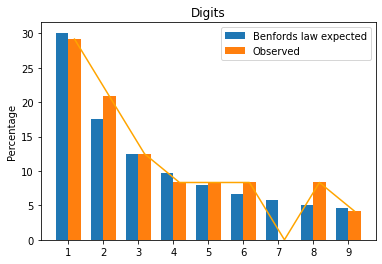

Chi Square Test in %  33.55192 %

                     0   1   2   3   4   5   ...    18    19     20     21     22     23
value                 1   1   2   3   5   8  ...  4181  6765  10946  17711  28657  46368
Leading Digit Value   1   1   2   3   5   8  ...     4     6      1      1      2      4

[2 rows x 24 columns]
                Count  Observed %  Benfords Expected %  Variation
LEADING DIGITS                                                   
1                   7       29.17                30.10    -0.0093
2                   5       20.83                17.61     0.0322
3                   3       12.50                12.49     0.0001
4                   2        8.33                 9.69    -0.0136
5                   2        8.33                 7.92     0.0041
6                   2        8.33                 6.69     0.0164
7                   0        0.00                 5.80    -0.0580
8                   2        8.33                 5.12     0.0321
9               

In [ ]:

benford_comp(generate_febonacci(24))

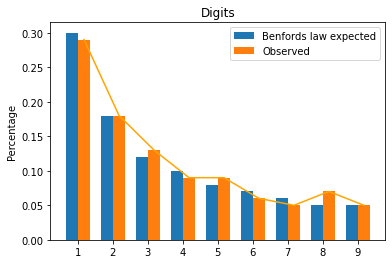

Chi Square Test in %  100.0 %

                     0  ...                              149
value                1  ...  9969216677189303386214405760200
Leading Digit Value  1  ...                                9

[2 rows x 150 columns]
                Count  Observed %  Benfords Expected %  Variation
LEADING DIGITS                                                   
1                  44        0.29                 0.30    -0.0001
2                  27        0.18                 0.18     0.0000
3                  19        0.13                 0.12     0.0001
4                  13        0.09                 0.10    -0.0001
5                  13        0.09                 0.08     0.0001
6                   9        0.06                 0.07    -0.0001
7                   8        0.05                 0.06    -0.0001
8                  10        0.07                 0.05     0.0002
9                   7        0.05                 0.05     0.0000


In [ ]:
benford_comp(generate_febonacci(150))

# CASE 03 rivers of the world

## Extracting data from excel

In [ ]:
### Reading Rivers data from excel sheet 

river_data_file = 'Rivers.xlsx'

rivers = pd.read_excel(river_data_file,
header=0,
index_col=False,
keep_default_na=True,
usecols='A:D'
)

## Data Cleaning

In [ ]:
### Performing Data cleaning and preprocessing

rivers.columns = ['index','River','Length(km)','Length(miles)']
rivers.head()

### removing columns with nan values
df=rivers.dropna().set_index('index')

cols_to_check=['Length(km)','Length(miles)']
# df[cols_to_check]=df[cols_to_check].map(lambda x: x.rstrip('*'))
df[cols_to_check] = df[cols_to_check].replace({',':'','\*':''}, regex=True)

## removing any daat with spaces in them
df=df[~df['Length(km)'].astype(str).str.contains(" ")]
df=df[~df['Length(miles)'].astype(str).str.contains(" ")]


## TESTING OUTPUT

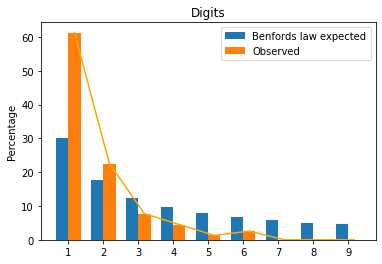

Chi Square Test in %  0.0 %

                      0     1     2     3     4    ...   151   152   153   154   155
value                6690  6387  6380  6270  5550  ...  1012  1010  1010  1006  1000
Leading Digit Value     6     6     6     6     5  ...     1     1     1     1    10

[2 rows x 156 columns]
                Count  Observed %  Benfords Expected %  Variation
LEADING DIGITS                                                   
1                  95       61.29                30.10     0.3119
2                  35       22.58                17.61     0.0497
3                  12        7.74                12.49    -0.0475
4                   7        4.52                 9.69    -0.0517
5                   2        1.29                 7.92    -0.0663
6                   4        2.58                 6.69    -0.0411
7                   0        0.00                 5.80    -0.0580
8                   0        0.00                 5.12    -0.0512
9                   0        0.0

In [ ]:
## creating a list of Leanght(miles) and converting them to int
x=df['Length(km)'].astype(int).tolist()
benford_comp(x)

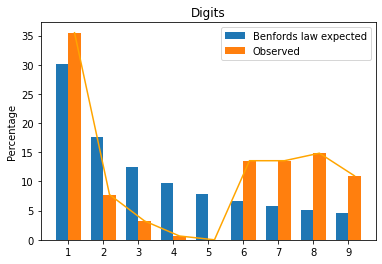

Chi Square Test in %  0.0 %

                      0     1     2     3     4    ...  151  152  153  154  155
value                4157  3969  3964  3896  3449  ...  629  628  628  625  620
Leading Digit Value     4     3     3     3     3  ...    6    6    6    6    6

[2 rows x 156 columns]
                Count  Observed %  Benfords Expected %  Variation
LEADING DIGITS                                                   
1                  55       35.48                30.10     0.0538
2                  12        7.74                17.61    -0.0987
3                   5        3.23                12.49    -0.0926
4                   1        0.65                 9.69    -0.0904
5                   0        0.00                 7.92    -0.0792
6                  21       13.55                 6.69     0.0686
7                  21       13.55                 5.80     0.0775
8                  23       14.84                 5.12     0.0972
9                  17       10.97              

In [ ]:
## creating a list of Leanght(miles) and converting them to int
x=df['Length(miles)'].astype(int).tolist()
benford_comp(x)